In [573]:
import pandas as pd 
import numpy as np
import plotly.graph_objects as go
from datetime import datetime
from math import pi
import math

In [574]:
df = pd.read_csv('./milad.csv')
len(df)

3348

In [575]:
df=df.rename(columns={"ending-value":"close","openning":"open"})
df.head()

,Unnamed: 0,symbol,name,amount,volume,value,lastday,open,last-value,last-change,last-percent,close,ending-change,ending-percent,min,max,year,month,day,date
0,46894,خپارس,پارس‌ خودرو,318,561712,3608122553,6000.0,6000.0,6621.0,621.0,10.35,6621.0,621.0,10.35,4000.0,10000.0,1382,2,17,2003-05-07
1,47002,خپارس,پارس‌ خودرو,94,124799,910907901,6952.0,7299.0,7299.0,347.0,4.99,7299.0,347.0,4.99,7299.0,7299.0,1382,2,21,2003-05-11
2,47135,خپارس,پارس‌ خودرو,139,179535,1375776705,7299.0,7663.0,7663.0,364.0,4.99,7663.0,364.0,4.99,7663.0,7663.0,1382,2,22,2003-05-12
3,47348,خپارس,پارس‌ خودرو,155,221434,1781657964,7663.0,8046.0,8046.0,383.0,5.00,8046.0,383.0,5.00,8046.0,8046.0,1382,2,23,2003-05-13
4,47386,خپارس,پارس‌ خودرو,104,140655,1188253440,8046.0,8448.0,8448.0,402.0,5.00,8448.0,402.0,5.00,8448.0,8448.0,1382,2,24,2003-05-14


In [593]:
stock97=df[df["year"] in [1395,1396,1397,1398]]
print(len(stock97))
stock97.head(10)


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [601]:
len(df[df["year"]==1394])

226

In [603]:
stock97=df[np.logical_or(np.logical_or(np.logical_or(np.logical_or(np.logical_or(np.logical_or
                                                                   (df["year"]==1396 ,
                                                                   df["year"]==1397),
                                                                   df["year"]==1398),
                                                                   df["year"]==1395),
                                                                   df["year"]==1394),
                                                                   df["year"]==1393),
                                                                   df["year"]==1392)]
print(len(stock97))
stock97.head(10)


1397


,Unnamed: 0,symbol,name,amount,volume,value,lastday,open,last-value,last-change,last-percent,close,ending-change,ending-percent,min,max,year,month,day,date
1951,462420,خپارس,پارس‌ خودرو,9,64008,40587468,613.0,632.0,637.0,24.0,3.92,614.0,1.0,0.16,632.0,637.0,1392,1,5,2013-03-25
1952,462647,خپارس,پارس‌ خودرو,20,63586,39459817,614.0,625.0,625.0,11.0,1.79,614.0,0.0,0.00,615.0,625.0,1392,1,6,2013-03-26
1953,462830,خپارس,پارس‌ خودرو,26,207835,131082089,614.0,620.0,635.0,21.0,3.42,617.0,3.0,0.49,620.0,637.0,1392,1,7,2013-03-27
1954,463212,خپارس,پارس‌ خودرو,27,75031,47147330,617.0,630.0,635.0,18.0,2.92,618.0,1.0,0.16,621.0,635.0,1392,1,10,2013-03-30
1955,463436,خپارس,پارس‌ خودرو,44,215419,133715565,618.0,640.0,616.0,-2.0,-0.32,619.0,1.0,0.16,616.0,640.0,1392,1,11,2013-03-31
1956,463722,خپارس,پارس‌ خودرو,48,119335,74252741,619.0,630.0,632.0,13.0,2.10,619.0,0.0,0.00,618.0,632.0,1392,1,14,2013-04-03
1957,464281,خپارس,پارس‌ خودرو,30,177527,113260544,619.0,635.0,643.0,24.0,3.88,622.0,3.0,0.48,632.0,643.0,1392,1,17,2013-04-06
1958,464638,خپارس,پارس‌ خودرو,45,252918,156448240,622.0,623.0,610.0,-12.0,-1.93,621.0,-1.0,-0.16,610.0,635.0,1392,1,18,2013-04-07
1959,464709,خپارس,پارس‌ خودرو,36,127325,76877282,621.0,639.0,603.0,-18.0,-2.90,619.0,-2.0,-0.32,600.0,639.0,1392,1,19,2013-04-08
1960,465088,خپارس,پارس‌ خودرو,42,263451,158391436,619.0,602.0,603.0,-16.0,-2.58,614.0,-5.0,-0.81,599.0,618.0,1392,1,20,2013-04-09


In [604]:
# stocko= stock97["open"] list  and stockc is stock97["close"] list
stocko=stock97["open"].tolist()
stockc=stock97["close"].tolist()

In [605]:
lows=[]
lows_price=[]
for j in range(len(stocko)): 
    minimum=min(stocko[j],stockc[j])
    if ( (j >10) and (j+10 < len(stocko)) ):
        if (minimum<=min(stocko[j-10:j+10]) and minimum<=min(stockc[j-10:j+10])):
            print("this is a low : ", j)
            lows.append(j)
            lows_price.append(minimum)

this is a low :  13
this is a low :  43
this is a low :  109
this is a low :  135
this is a low :  208
this is a low :  221
this is a low :  240
this is a low :  269
this is a low :  312
this is a low :  326
this is a low :  346
this is a low :  363
this is a low :  425
this is a low :  473
this is a low :  500
this is a low :  554
this is a low :  620
this is a low :  634
this is a low :  635
this is a low :  661
this is a low :  680
this is a low :  706
this is a low :  770
this is a low :  813
this is a low :  824
this is a low :  844
this is a low :  868
this is a low :  909
this is a low :  924
this is a low :  956
this is a low :  1013
this is a low :  1061
this is a low :  1079
this is a low :  1100
this is a low :  1129
this is a low :  1189
this is a low :  1275
this is a low :  1302
this is a low :  1324
this is a low :  1344
this is a low :  1369


In [606]:
my_min=pd.DataFrame(columns=["X","Y"])
my_min["X"]=lows
my_min["Y"]=lows_price
my_min.to_csv("./minimums.csv")

In [622]:
#finding the best lines 
# cnt = numbers of line segments
cnt=0
# start and stop[cnt] = start poit in x axes and stop point for each line segments
startm=[]
stopm=[]
checkedpoint=[]
lastpoint=0
count_max=0
a_maxm=[]
b_maxm=[]
xarr=my_min["X"].tolist()
yarr=my_min["Y"].tolist()
max_last=0
# all tangents from 80 to -80 digree . i will break them in to 1000 pieces
digree=np.linspace(-80,80,1000)
digrees=np.tan(digree*pi / 180)


for point in range(len(xarr)) :
    max_last=0
    count_max=0
#  x and y are the ones of this point
    x=xarr[point]
    y=yarr[point]
# for this point i am breaking the line into 100 pieces
    b_fakes=np.linspace(y-15,y+15,100)  
    for b in b_fakes:
        for a in digrees:
            count=0
            for p in range(point+1,len(xarr)):
            #  x_ and y_ s are for all next points in new dimensions !!
                x_ = xarr[p]-x
                y_ = yarr[p]
                if((x_*a+b>=y_-15) and (x_*a+b<=y_+15)):
                    count+=1
                    lastpoint=xarr[p]
                elif (y_+10 < x_*a+b ):
                    break
            if(count>count_max):
                max_last=lastpoint # max last baraye save kardane lastpointi ke niaz darime . maxof_a , b ham hamintor
                count_max=count
                maxof_a=a
                maxof_b=b
            lastpoint=0
            
#   if this start point include a line that touch three points: count_max are the number of other points .
    if(count_max>1):
        repetitious=False
        a_in_radian=math.atan(maxof_a)
        a_in_degree=math.degrees(a_in_radian)
        for cnt in range(len(a_maxm)):
            if((math.degrees(math.atan(a_maxm[cnt])) >= a_in_degree -5) and 
               (math.degrees(math.atan(a_maxm[cnt])) <= a_in_degree +5) and
               (stopm[cnt]==max_last)):
                repetitious=True
               
        if(not(repetitious)):
            a_maxm.append(maxof_a)
            b_maxm.append(maxof_a*(-x)+maxof_b)
            startm.append(x)
            stopm.append(max_last)
    
        
        
print(count_max)

0


In [623]:
print(len(startm))
print(len(stopm))

13
13


Now We Go Sarvaghte Max Points :)

In [624]:
highs=[]
highs_price=[]
for j in range(len(stocko)): 
    maximum=max(stocko[j],stockc[j])
    if ( (j >10) and (j+10 < len(stocko)) ):
        if (maximum>=max(stocko[j-10:j+10]) and maximum>=max(stockc[j-10:j+10])):
            print("this is a high : " ,j)
            highs.append(j)
            highs_price.append(maximum)

this is a high :  38
this is a high :  65
this is a high :  93
this is a high :  114
this is a high :  134
this is a high :  175
this is a high :  212
this is a high :  233
this is a high :  263
this is a high :  332
this is a high :  384
this is a high :  446
this is a high :  485
this is a high :  511
this is a high :  523
this is a high :  547
this is a high :  599
this is a high :  624
this is a high :  650
this is a high :  668
this is a high :  689
this is a high :  724
this is a high :  747
this is a high :  784
this is a high :  798
this is a high :  835
this is a high :  854
this is a high :  871
this is a high :  886
this is a high :  900
this is a high :  918
this is a high :  932
this is a high :  968
this is a high :  990
this is a high :  1040
this is a high :  1085
this is a high :  1109
this is a high :  1171
this is a high :  1217
this is a high :  1242
this is a high :  1313
this is a high :  1336
this is a high :  1353
this is a high :  1384


In [625]:
#finding the best lines 
# cnt = numbers of line segments
cnt=0
# start and stop[cnt] = start poit in x axes and stop point for each line segments
start=[]
stop=[]
checkedpoint=[]
lastpoint=0
count_max=0
a_max=[]
b_max=[]
xarr=my_max["X"].tolist()
yarr=my_max["Y"].tolist()
max_last=0
# all tangents from 80 to -80 digree . i will break them in to 1000 pieces
digree=np.linspace(-80,80,1000)
digrees=np.tan(digree*pi / 180)


for point in range(len(xarr)) :
    max_last=0
    count_max=0
#  x and y are the ones of this point
    x=xarr[point]
    y=yarr[point]
# for this point i am breaking the line into 100 pieces
    b_fakes=np.linspace(y-15,y+15,100)  
    for b in b_fakes:
        for a in digrees:
            count=0
            for p in range(point+1,len(xarr)):
            #  x_ and y_ s are for all next points in new dimensions !!
                x_ = xarr[p]-x
                y_ = yarr[p]
                if((x_*a+b>=y_-15) and (x_*a+b<=y_+15)):
                    count+=1
                    lastpoint=xarr[p]
                elif (y_-10 > x_*a+b ):
                    break
            if(count>count_max):
                max_last=lastpoint # max last baraye save kardane lastpointi ke niaz darime . maxof_a , b ham hamintor
                count_max=count
                maxof_a=a
                maxof_b=b
            lastpoint=0
            
#   if this start point include a line that touch three points: count_max are the number of other points .
    if(count_max>1):
        repetitious=False
        a_in_radian=math.atan(maxof_a)
        a_in_degree=math.degrees(a_in_radian)
        for cnt in range(len(a_max)):
            if((math.degrees(math.atan(a_max[cnt])) >= a_in_degree -5) and 
               (math.degrees(math.atan(a_max[cnt])) <= a_in_degree +5) and
               (stop[cnt]==max_last)):
                repetitious=True
               
        if(not(repetitious)):
            a_max.append(maxof_a)
            b_max.append(maxof_a*(-x)+maxof_b)
            start.append(x)
            stop.append(max_last)
    
        
        
print(count_max)

0


fig = go.Figure(data=[go.Candlestick(x=df['date'],
                open=df["open"],
                high=df['max'],
                low=df['min'],
           
                                    close=df['close'])])
fig.show()

In [626]:
print(start)
print(stop)

[263, 332, 446, 485, 599, 624, 650, 689, 724, 835, 854, 871, 886, 900, 918, 1171, 1217]
[1336, 446, 523, 547, 886, 932, 1109, 1384, 968, 900, 918, 968, 1040, 932, 1040, 1242, 1384]


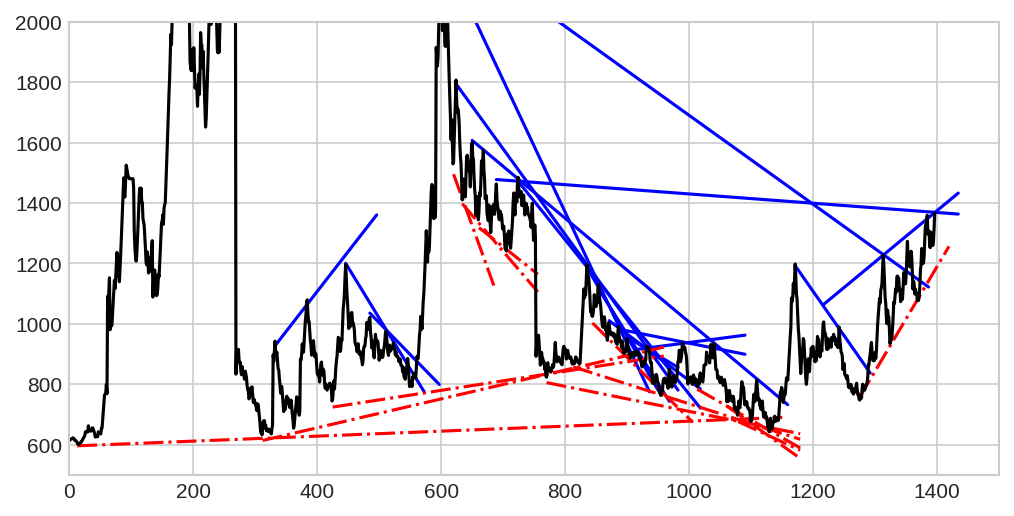

In [627]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
x=np.arange(len(stocko))
plt.figure(num=None, figsize=(8, 4), dpi=150)
plt.xlim(0,1500)
plt.ylim(500,2000)
# plt.scatter(highs, highs_price ,c="r")
# plt.scatter(lows, lows_price ,c="g")
for cnt in range(len(start)):
        xx=np.linspace(start[cnt],stop[cnt]+50,dtype=float)
        plt.plot(xx,a_max[cnt] * xx +b_max[cnt] , linestyle="-",c="b")
for cnt in range(len(startm)):
        xx=np.linspace(startm[cnt],stopm[cnt]+50,dtype=float)
        plt.plot(xx,a_maxm[cnt] * xx +b_maxm[cnt] , linestyle="-.",c="r")
plt.plot(x,stockc,linestyle="-",c="k")


In [628]:
indexes=[]
for cnt1 in range(len(a_max)):
    for cnt2 in range(len(a_maxm)):
        if((stopm[cnt2] - stop[cnt1]<=50) and (stopm[cnt2] - stop[cnt1]>=-50)):
            indexes.append([cnt1,cnt2])
print(len(indexes))
indexes          
            

24


[[0, 12],
 [4, 1],
 [4, 2],
 [5, 1],
 [5, 2],
 [5, 8],
 [6, 0],
 [6, 6],
 [6, 7],
 [6, 9],
 [6, 10],
 [6, 11],
 [7, 12],
 [8, 8],
 [9, 1],
 [9, 2],
 [10, 1],
 [10, 2],
 [10, 8],
 [11, 8],
 [13, 1],
 [13, 2],
 [13, 8],
 [16, 12]]

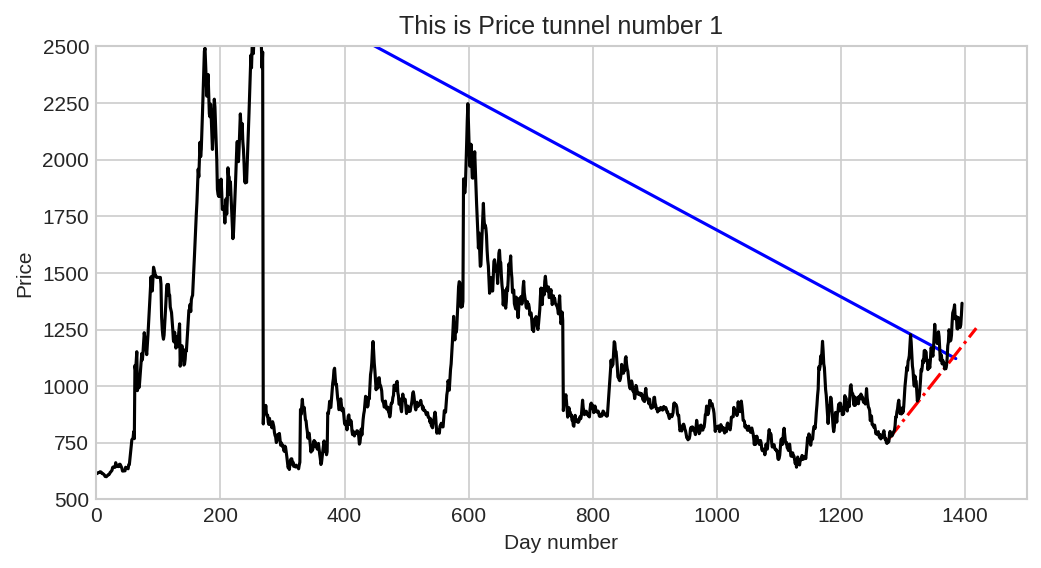

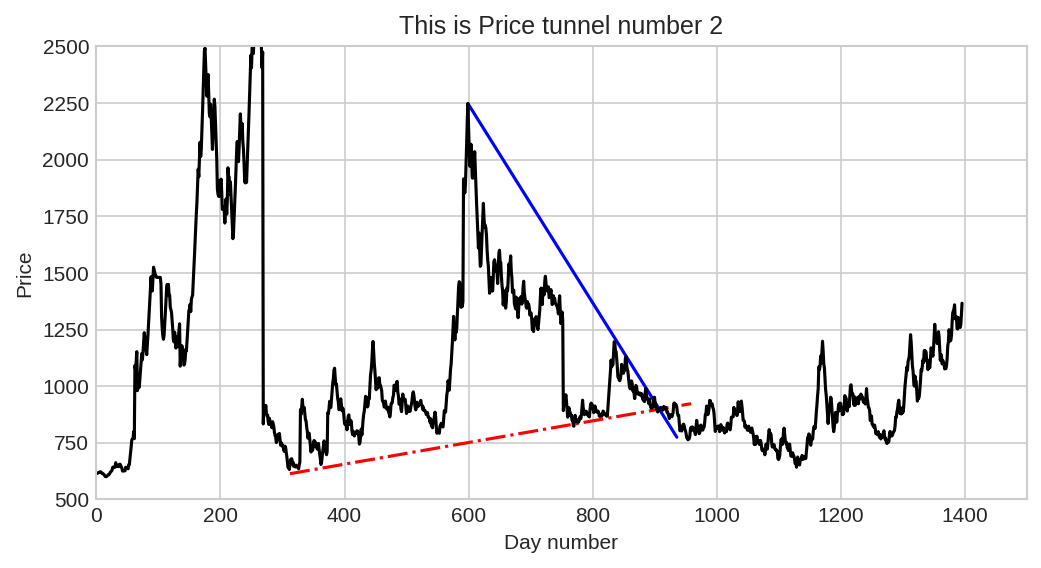

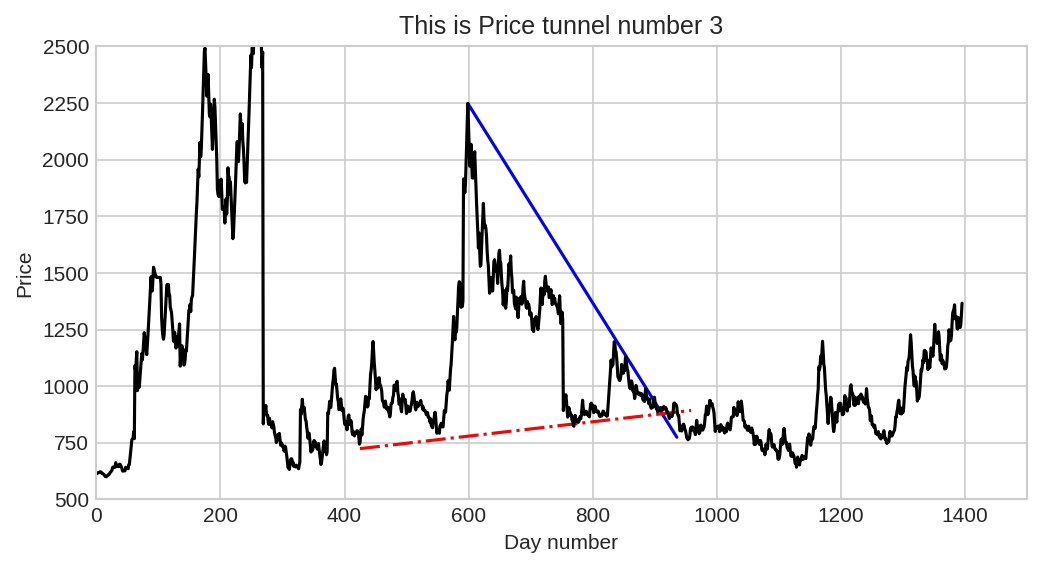

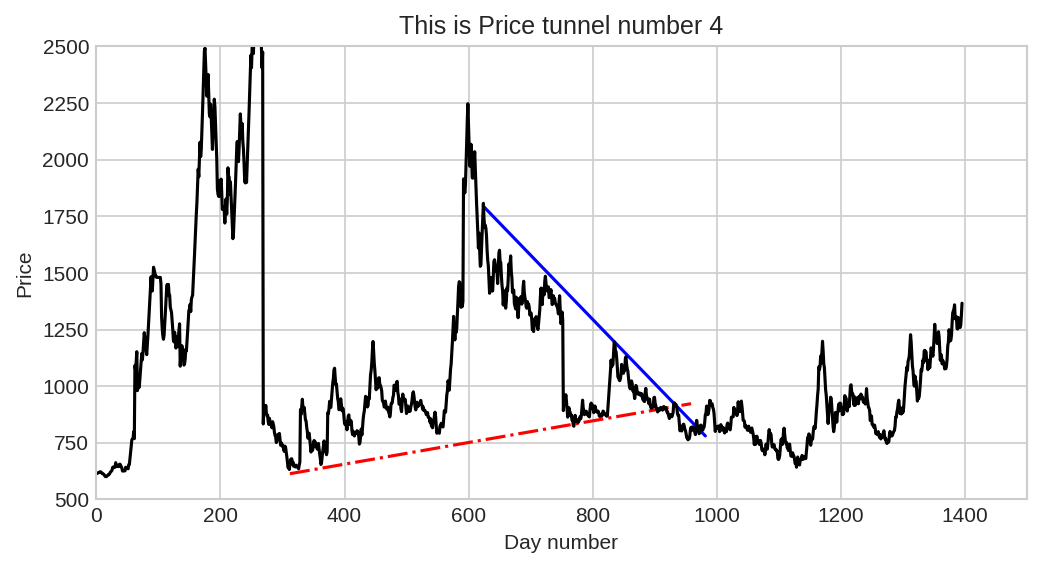

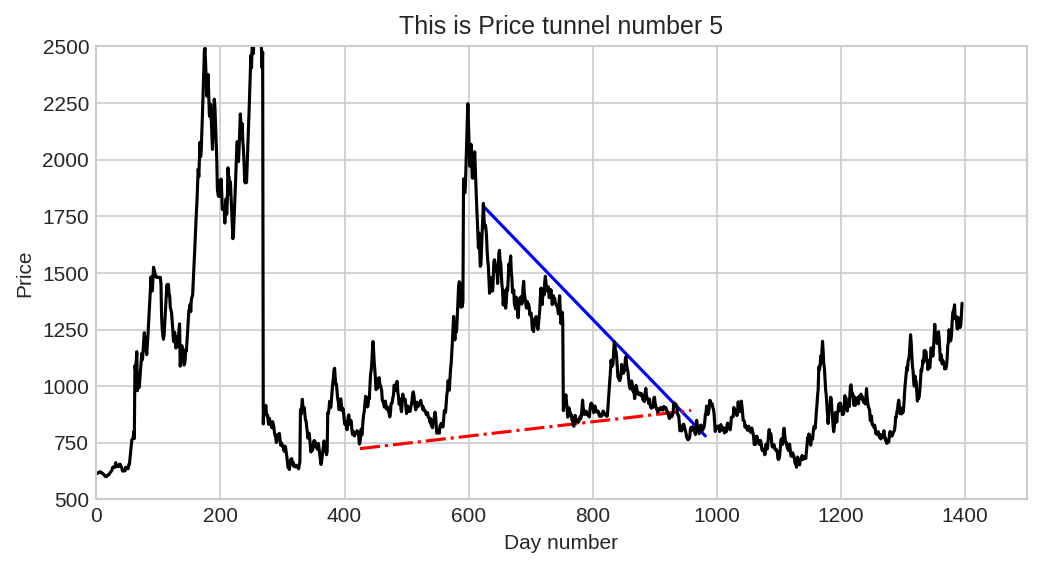

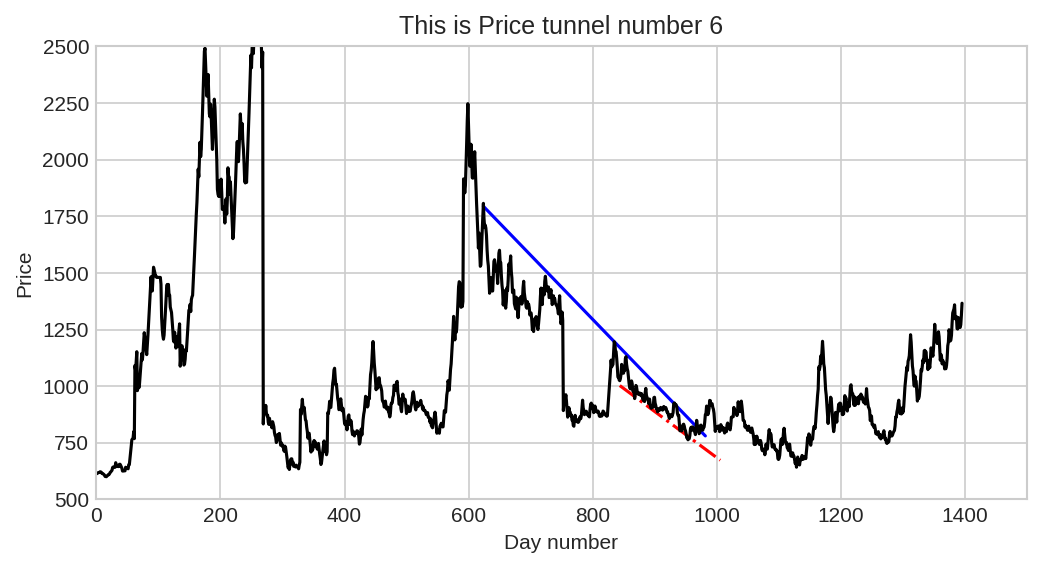

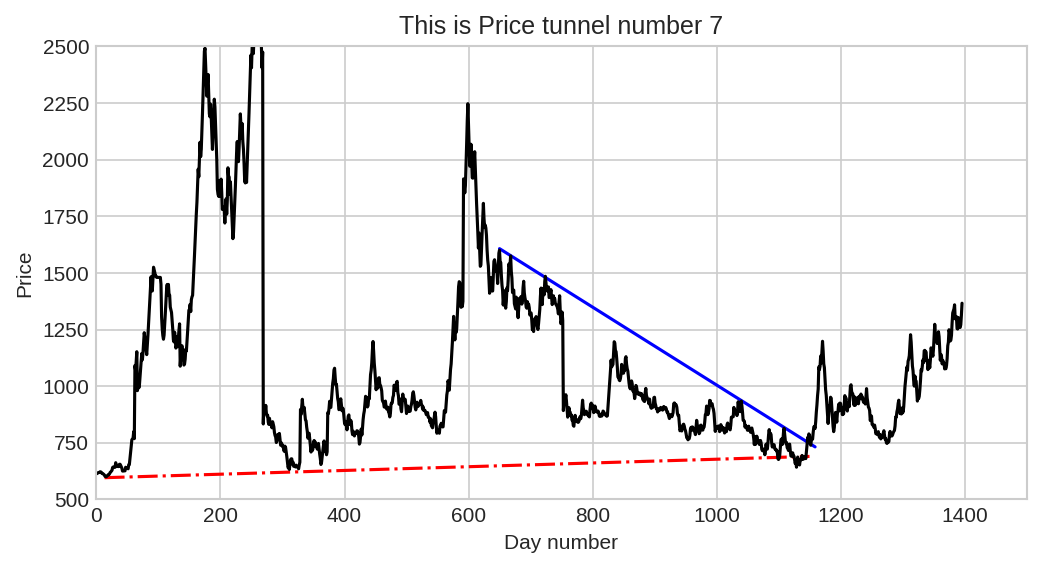

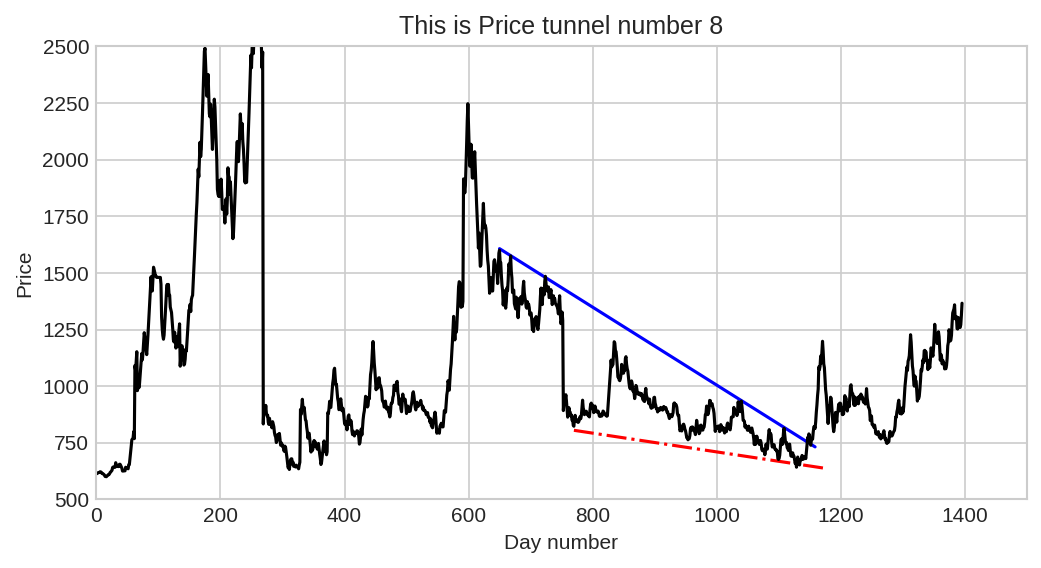

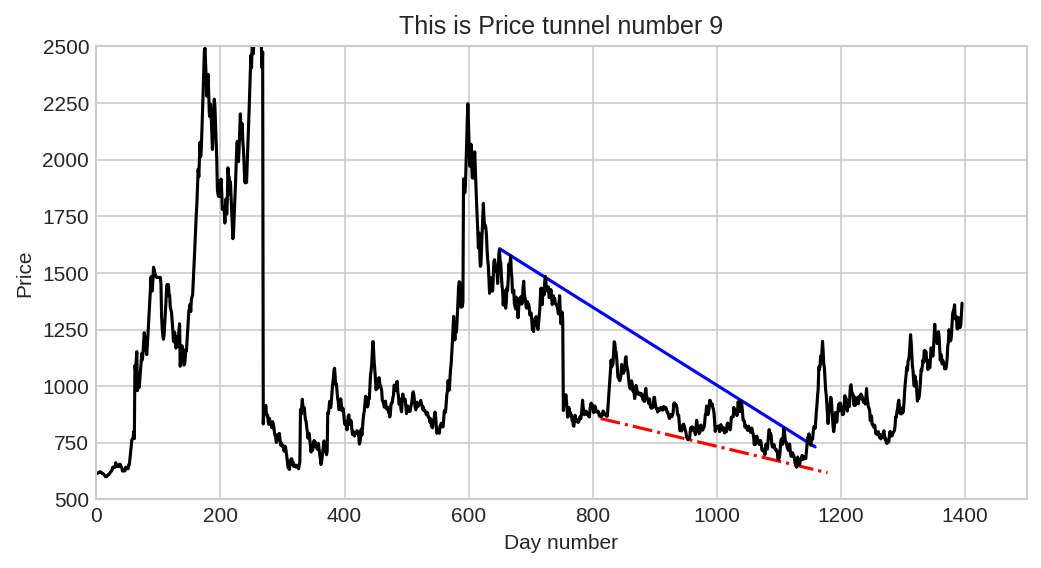

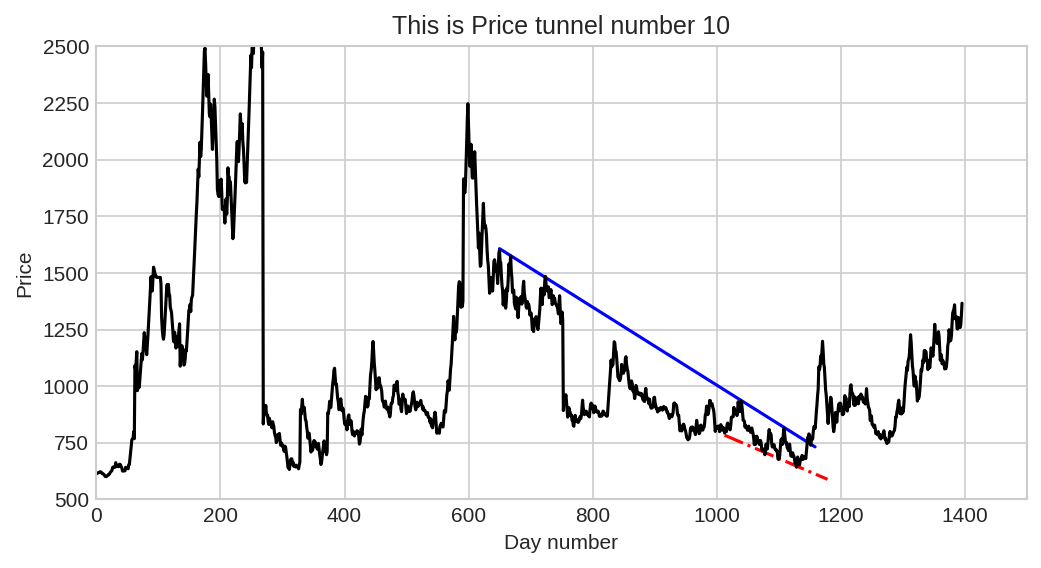

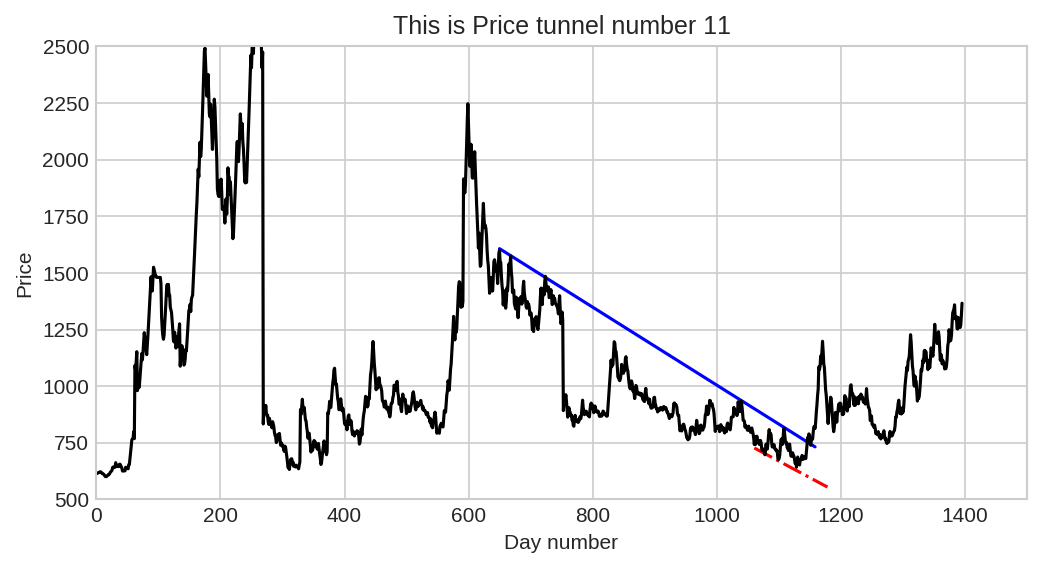

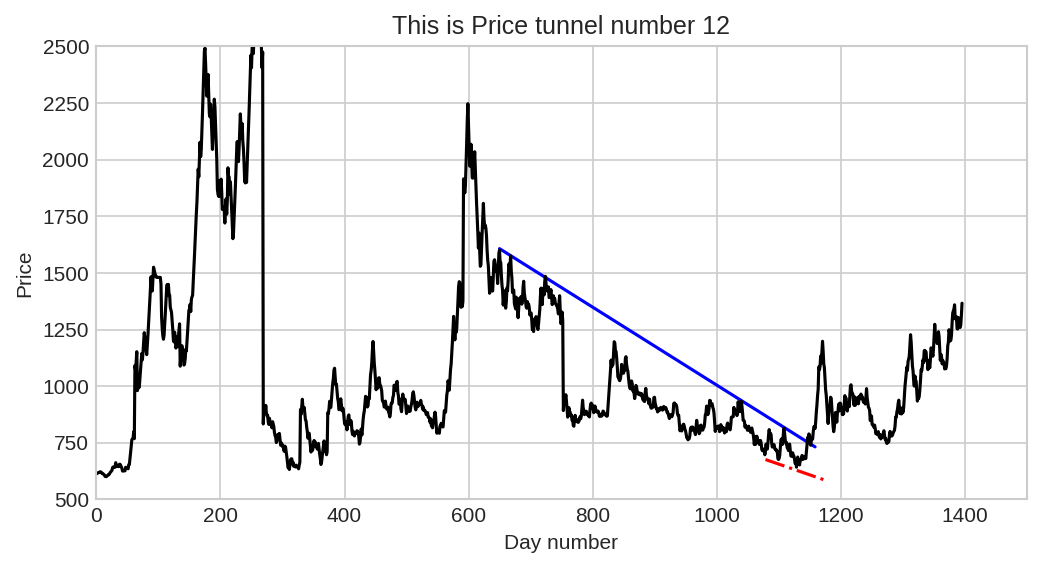

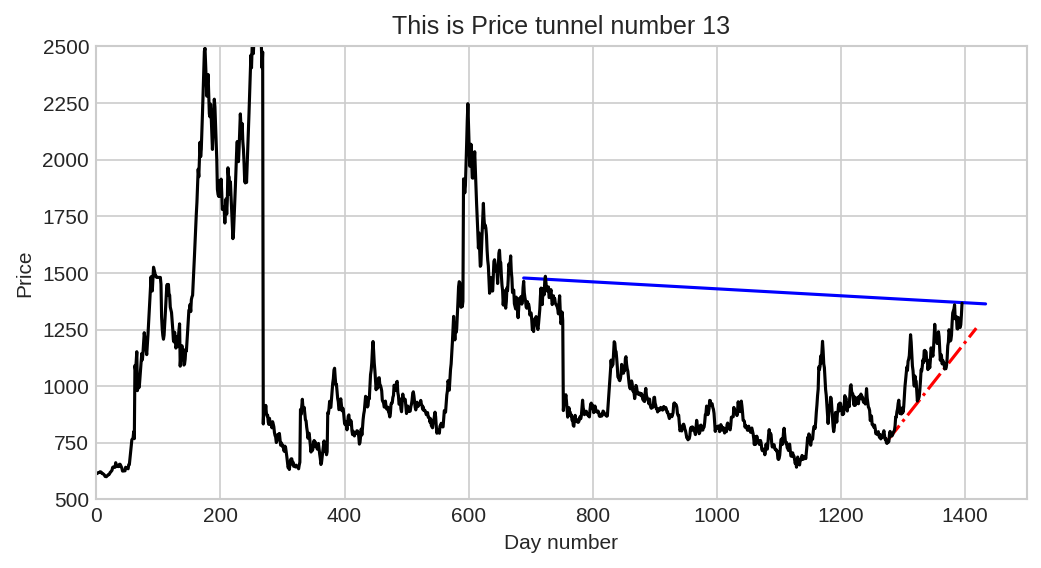

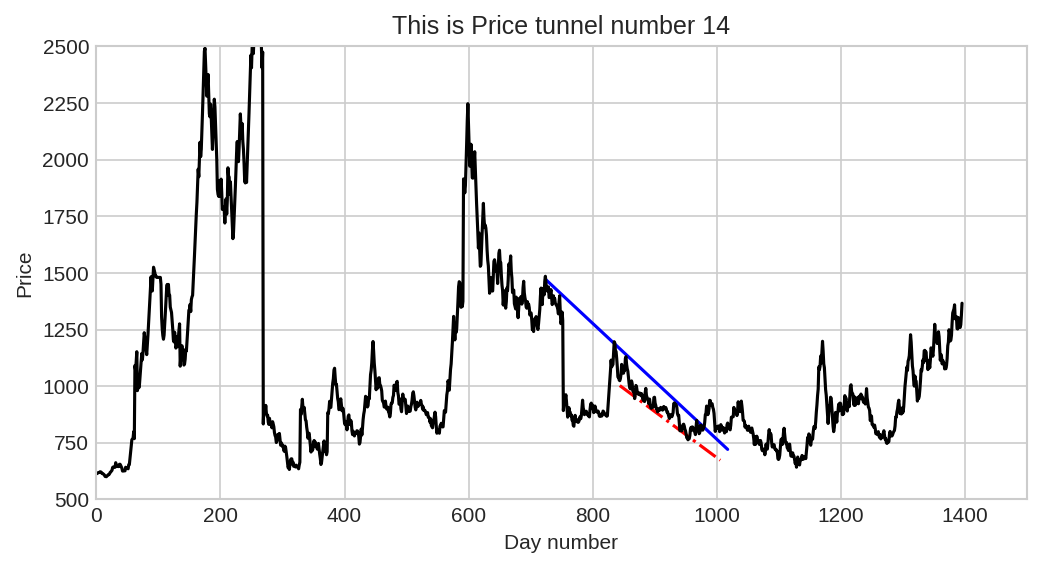

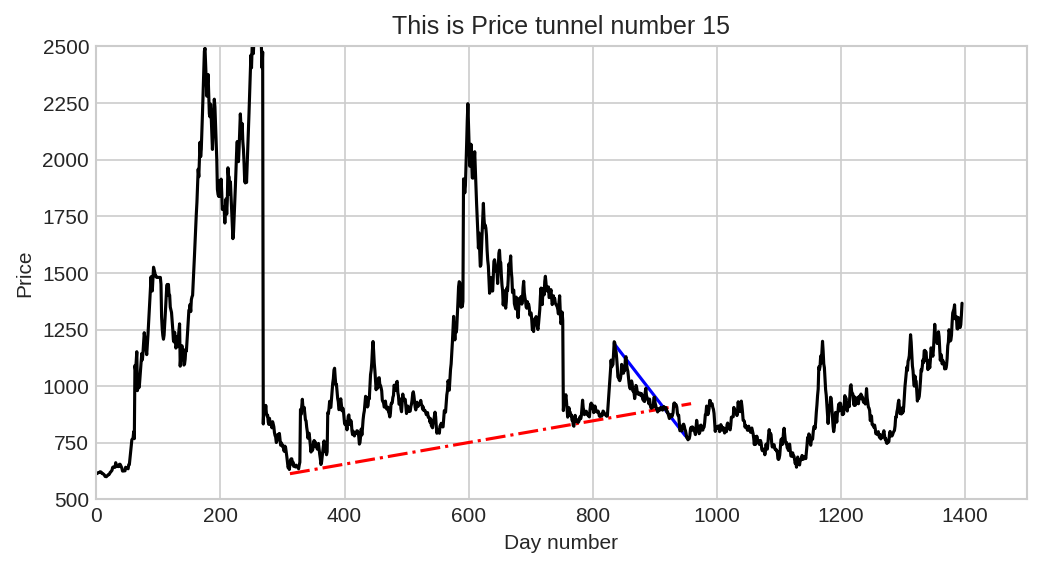

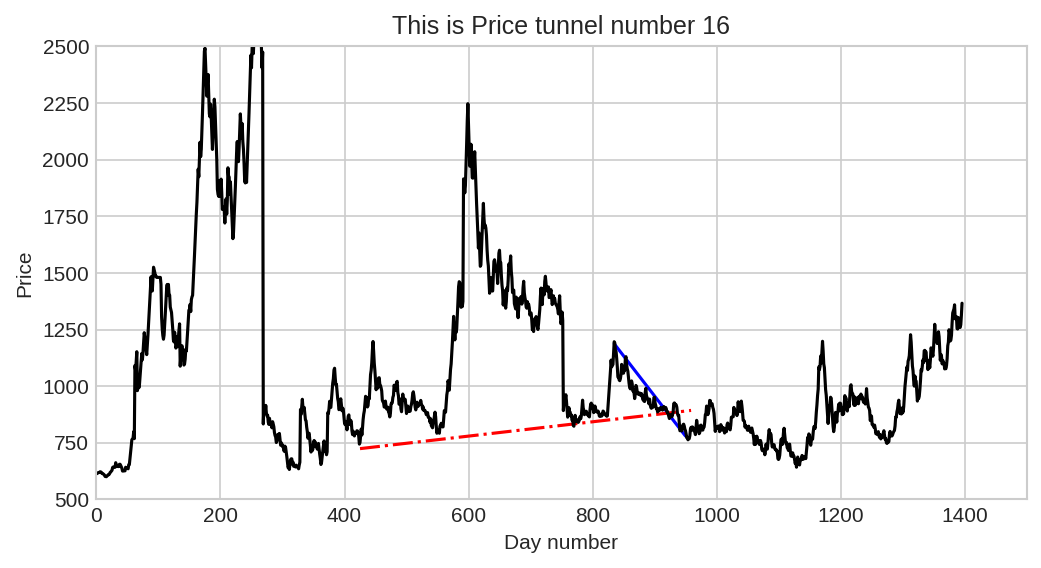

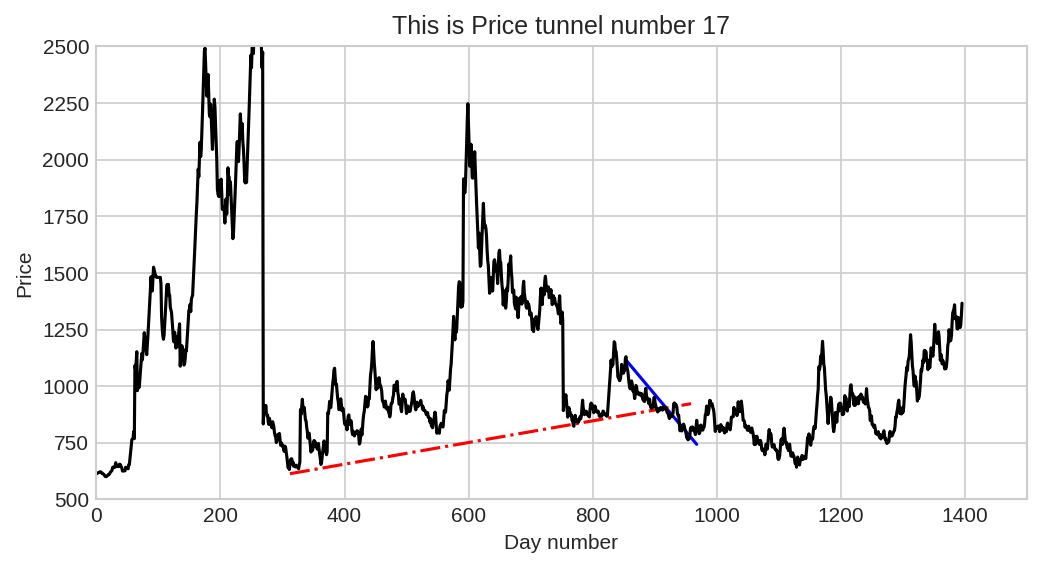

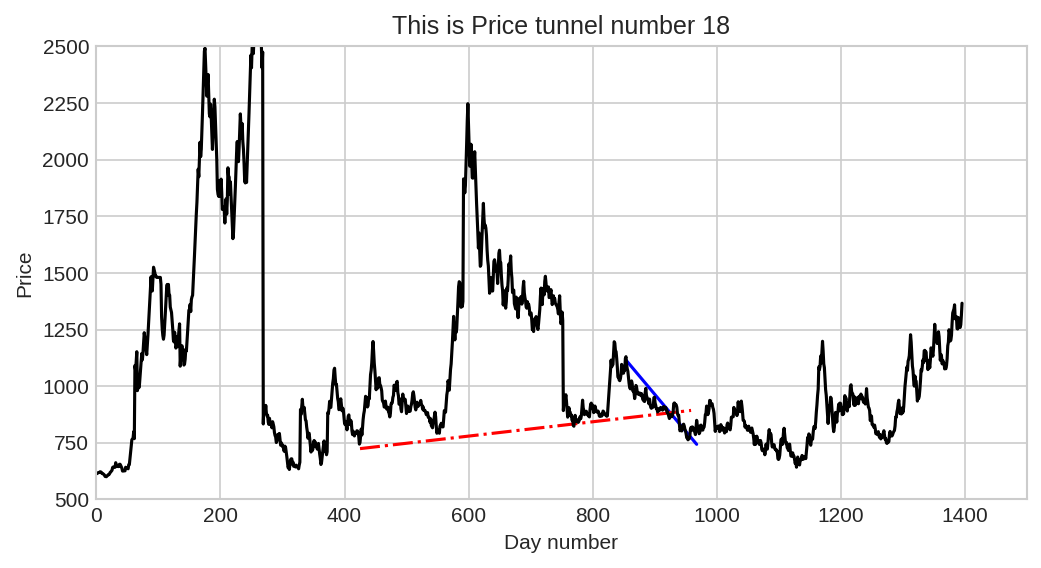

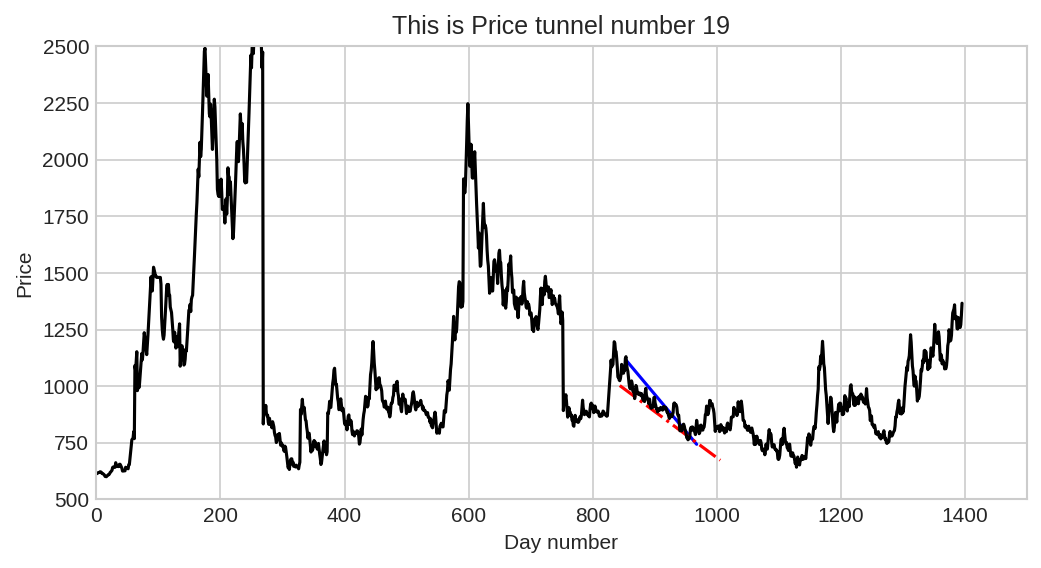

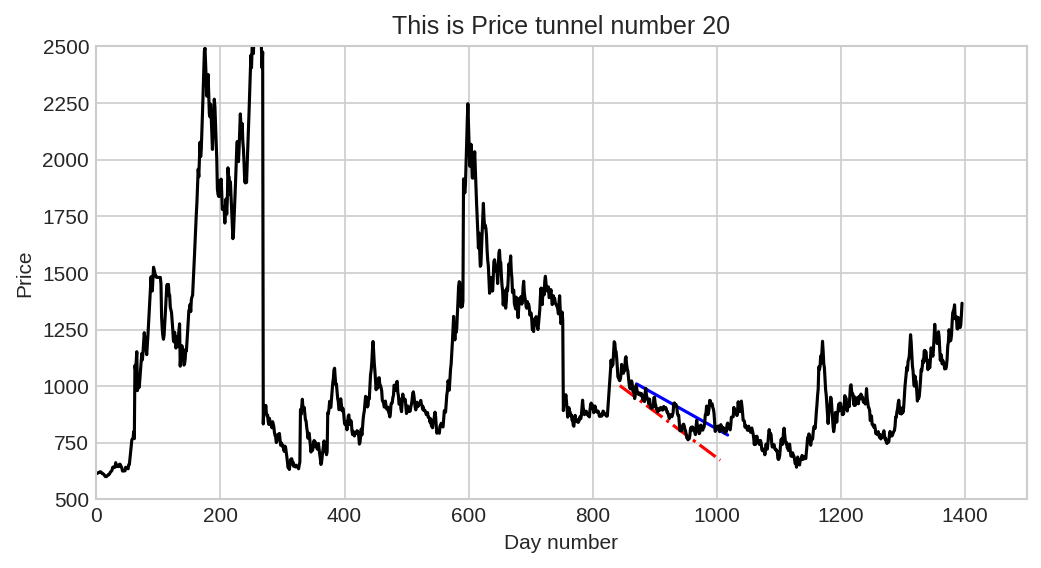

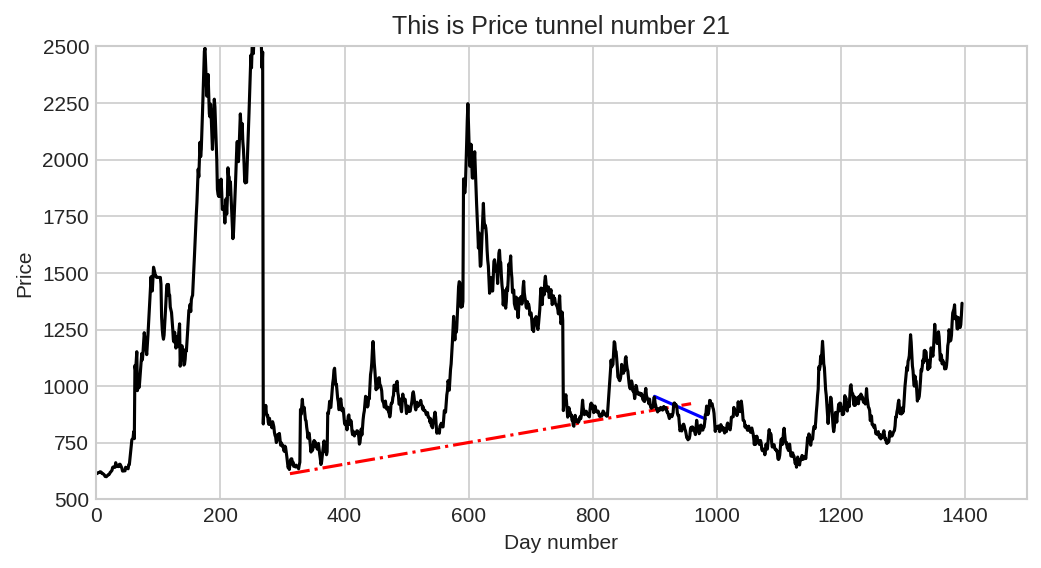

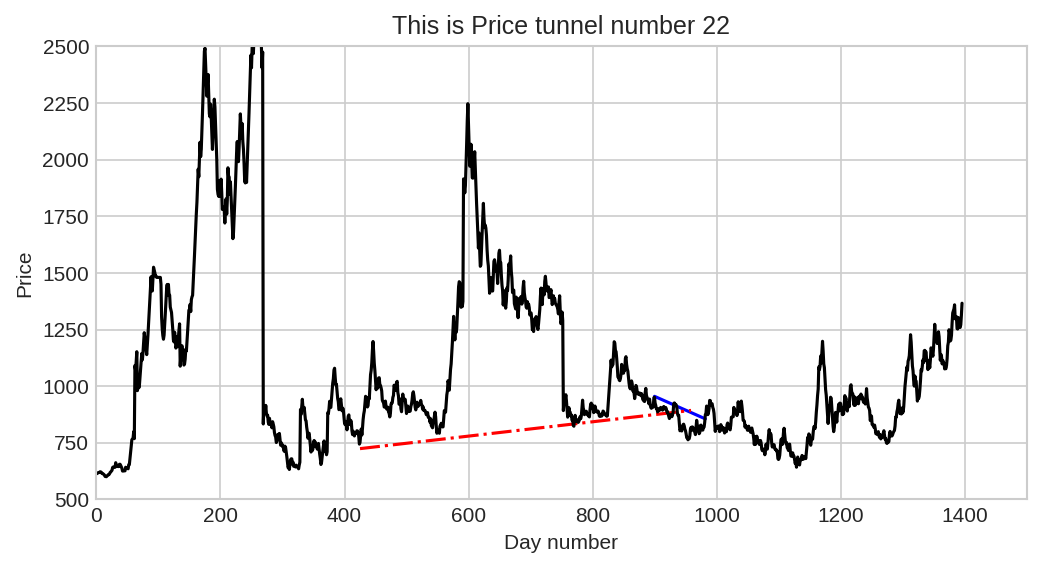

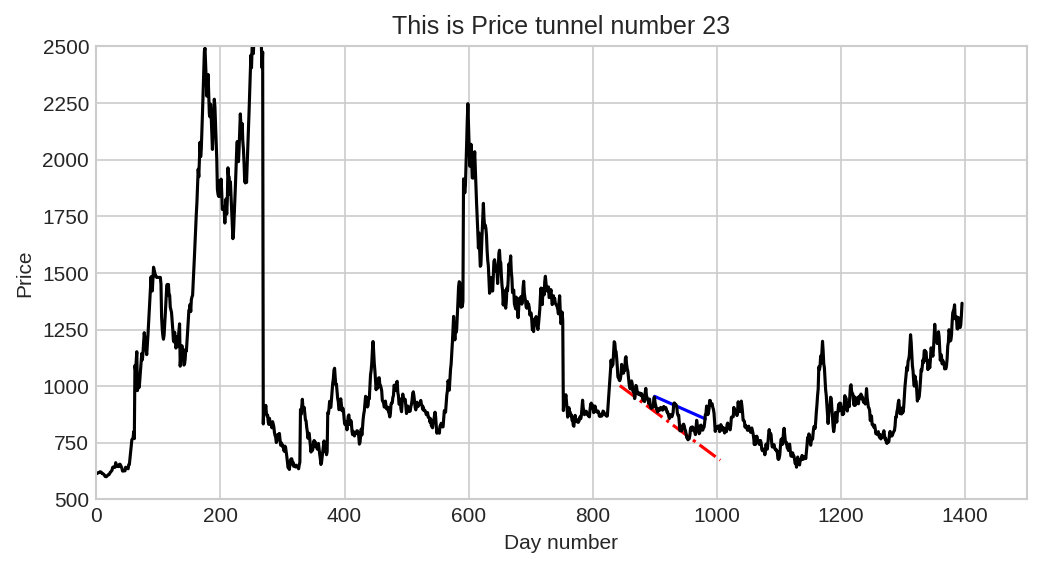

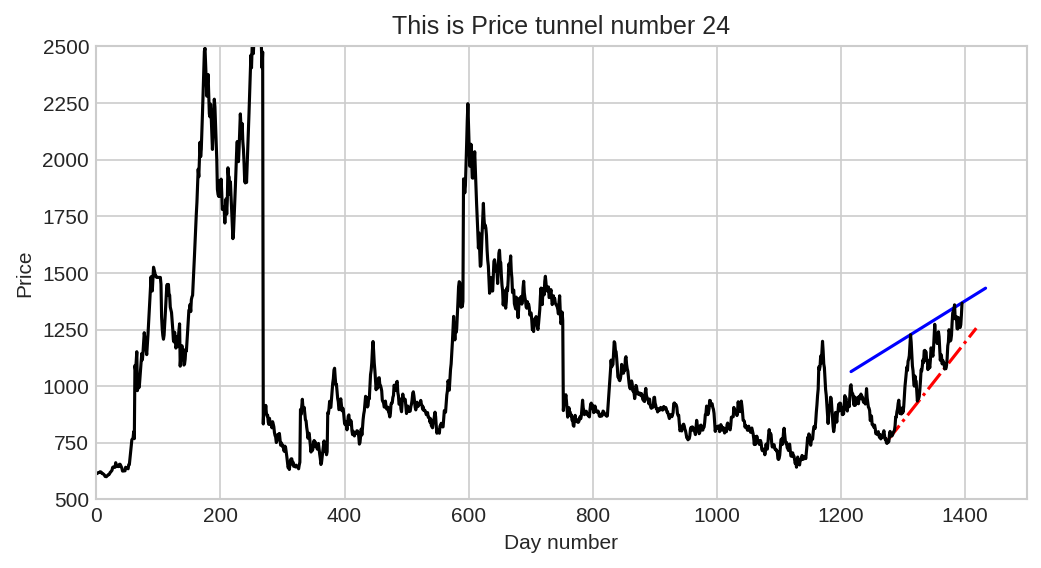

In [629]:
%matplotlib inline
import matplotlib.pyplot as plt
import time
plt.style.use('seaborn-whitegrid')
x=np.arange(len(stocko))
# plt.scatter(highs, highs_price ,c="r")
# plt.scatter(lows, lows_price ,c="g")
for cnt in range(len(indexes)):
    
    plt.figure(num=None, figsize=(8, 4), dpi=150)
    plt.xlim(0,1500)
    plt.ylim(500,2500)
    plt.xlabel('Day number')
    plt.ylabel('Price')
    plt.title("This is Price tunnel number {}".format(cnt+1))

    xx=np.linspace(start[indexes[cnt][0]],stop[indexes[cnt][0]]+50,dtype=float)
    plt.plot(xx,a_max[indexes[cnt][0]] * xx +b_max[indexes[cnt][0]] , linestyle="-",c="b")

    xx=np.linspace(startm[indexes[cnt][1]],stopm[indexes[cnt][1]]+50,dtype=float)
    plt.plot(xx,a_maxm[indexes[cnt][1]] * xx +b_maxm[indexes[cnt][1]] , linestyle="-.",c="r")
    plt.plot(x,stockc,linestyle="-",c="k")
    plt.savefig("../trade/Chart images/price_tunnel {}".format(cnt+1))
    plt.show()


print(len(start))

In [616]:
len(stocko)

1397

In [617]:
len(highs)

44